#Assignment 1A

Different type of Kernels for edge detectors


Importing the libararies and packages


In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

##Reading the image

The image url is provided as a input .

In [0]:
image = url_to_image("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUSEhMVFhUVFRcWFhcVFRgYFRUVFRYWFhUVFRcYHSggGBolGxUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy8mICUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBFAMBEQACEQEDEQH/xAAaAAADAQEBAQAAAAAAAAAAAAACAwQFAQAG/8QARBAAAQMCAwUFBQcCAwYHAAAAAQACEQMhBBIxBUFRYXETIoGRwQYyobHRFBVCUmLh8HKCI5LxM0OywtLiFjRTY4OTov/EABoBAAMBAQEBAAAAAAAAAAAAAAECAwAEBQf/xAA1EQACAQIEAQoGAwEBAAMAAAAAAQIDEQQSITFBBRMUUWGBkaGx8CIyccHR4RVC8VIjM5Ki/9oADAMBAAIRAxEAPwD5JoX0Q8EaxqxhzaaW5hzcPeNPRK56XDbWwZw0bwhnA0ebTWuYa2mlbMOZSSOQyQ0UEuYZIIYdDOHKNZh0jmFI6cMtnNlOjDLZzZQ/syXnA5QKmGTKYsokrqCspkrDqVBTlMZId2ISZhrAGlyTZgC3UkykCwBoo5jWEvpJ1IVoUaSfMAE0kcxj3YrZjAOYimYU5qZMwtwRMLcExgCFjAlqxjmVAIJCxgSEGYEhCwR7QmANaVjFFJ8acZ5+aRxNco7Qu1JPUyp5UtkFtvcY1oQbZj2Va4BjGpWFFLGKTZRIqp01NyHSHtohTciigEKcIZg5bBiilzDZDwpLZjZA+xQzDOAL6NkykJKBE+ldXUjma1G0aSSUh4xHGlZJmHy6CjSTZhcoHZJswuXUF9NFSM0TPYqpiNCXU02YWwORG4LAPCZGEuanTFFOCZBEuCdAFkImBLVjHC1YwJasEEtWMCQgYGFghNKIBrVgDWIMw9hSMJRTU2FFTGKbYyQYppcwUh1NIxkVUlKRWJXTaotnRFDOyS5h8o2nSSOQyiM7FLmGyoIUUMxrI4+kipCuJnV230XVB6HHNajsPSsknIpTjoOdRU1Io4Cn0k6kK4WF9kmzCZSeq1UiyUlqTuYqJk7C+xlNmBlOOpIqQbCHsTpiNCHtVExGJdTTpgFmkjmMCaSOYwBpI5jAmmtmMCaaNwgFi1zAlq1wgZVg2AAREGNCJhjSsAc0pGEopuSNGLKTlGSKJllNsqLdiiGigkzhysfSYkkx4RLKTFCTOuKLGU1FyKhhiW5hgpoZhsrCFNC5sp40lsxnEz8TRuumEtDmqRuyihRspTlqVhGyGuppcwwDqaZSBYB9IIqQHFEz8PO5UUyUqdzn2Ancjzy6wcw2cfgiBp/qgqyb3DKi0tiWpQVlMjKmTPoKqmScRFSgnUybiJdRT5xcot1NNmNlFOYmzAsKc1NcFgC1G5rAFqa5rAFi2Y1gHMRuNYWWrXMIanJjGrADAWuYNqzMPplIzFVIqUhkaOHqLmmi6ZqUIK5ZXR1ws0Udip5yuQdSakkx0VUwpNjxRXRA3ifP0UZtvZl4xXFDxk3C/Dd8bqXx7N6eZRRXUdyg6kD+26F2np6jOKPNeBNmnnE/NFxza3YtjNxxaYhsG66qV1uzlq2eyDoMsFpPUEVcIsS3C0B2abMbKC9FCs8yrGkeQnziUHFPcyk1sG/GPtpbTut+l0iowV+3tY3OSJMTiXu1PlYeQVqdOEdkJOcnuZ1WouqKOWTsSvJVVY53cW5hKa6FsxbqZTKQbMUaKbODKwTRWzmygOoI5w5BZoJs5sqAdSRzgyinU0cwMot1NNmM0LLEcxiBqtciNaFrgDCxrDGoXAGELmsOpvStBRXQqKMkPFmrhK65KkTqoz4GvQqSuOSsdyH5Ulx8rGUylY8UV0yoSZ0xjcYFPMVUAmtlI5pbjZUObh5E6KLxNnZAsiLHUGDVx8APHfoumjWqS2j78Dnq047t2HYXDgtBB+HqhUruMrNBhSVrna2HLdfhcIwrxnsZ09BDxAVk7sSUEkTQq3I5DuRDMMqYt4TJk5InqKiEAOCP8+q3PIPMsWcME/OMTm0CaARzmyIDsgjmBlR4UhvEoZnwMoLqDFVoBAptvvv9UjjJu+Z+RWM1FWyokqAcFaLJNJk1SkqKZN07kz6aopCOmJc1OpCuIl7UykI4iSE1wZTKAXRc57DAjc1g2la4LDGhC5rDGhC4Mo1oSthsNYErYyiV0aijJDxNTCYlctSB3UpPY1sPWlcc1Y64alEKWY6Ob6htOopzL00VNeuGcmmWsG2opybNYMPSNgsZ209y9PCTTRy4mF7Mdh3w0dElXWRWlG0UedWumUbIz1dievWkwrQjZEKju7HqQQnManSvqdqPWiwyiSVHzoro5ZK5xrVnJG5pjTUKRJIplbFlqbMLzTPFiGcPM6AFoRzG5oW5qdSA6Ql7U6YjpinBNcnlEvamUgZRDwnTFsTvanUhbE9RqdSFcEILU2YGRGY0roucmUMNWzGyhBi2c2RhtatmNkGNCVyMqY1oSuQypjmNSuZSNIcxqm5jqkkU0jCnJloxsW4esQoTSZeEZJ6GnQxS4qqtqelRVyjOuJ4hI6Oa4h0665qtTqHyD+0XLz5sgYqIc6gZSPaT7BehyfWTbRKrSzIZTf3R0SVMR/6MdU7Kwp77K8cTFuwOaFU2kp6mNpxW4iw2uo19SFzRxMZMtzemgh1Uldka0I8SUqDkAHJ+kQfEXozCDikeKpriP0d8QwpSxseA6w6O5kixVxuaQDnKsa1xXTQsvV41BJUhb3qsZEXAS6oqonKHUJfUTIk6bEuenTJumJfKfMiboy6hTmFNnRujyFuolbnEboswDQR51G6LIyhTXRnOZ0+wY2hwQ5xIPMt7ILsitziM6TXAY1qDmFQYbWpXNDKk3shrKSV1UVjhZvgObSKR1o9ZWOCqPgMa1I60bXuWjgntYc1c08XTjq5I6YYF9QxpXLPlCkv7I6YYHrGNqHUTZclXlKmuJ0xwqQ6jizovJxGKhJ5kW5lLcc6tvXJ0xrQHNobTxR0uoTr8QOmgvtB5pekdoObQjFVS7cV0UMc6T0YVTjxFtxR0BReM1uNzKBqYo2EjzRjjLbB5pGhg9olgs9oteSL+BXNUxDk7kp0FLdDRttzxldleOcn5H4qcqvWL0RRd1dDGgO1pAc2Ej1hZY2S0TFcLcfEL7FvBtzsfoj0yb4mz8Ghbmgft9UFiZPiPa5LXrNG9dFOvIZQuTOxa641Gw82B9oJ0+YHzXVHEQhu/VgdM8XniPMJ1ynTitE/ATmbgGeXmPqqLlenbZ+AOjo9k4keam+WtfhizLCx4gli38xM3RYAlnTzC38uwrDR6gXNOsJf5jXW4yw0SZ2I6eat/JZlsxuipCqmM6pqdele9n3t/kMqMhBxY5ruWLVjleHdzwa3gFHp9XrK9CpPgMDW8AkfKNTiMsFS6vJBZRwCl/JTTvd+o7wdNq1kd7IcAnXK0uLfghHgKfUe7LkguV5cX5IPQKfBHojcpz5Tz/N+PO5WGFUdgHnnCh01vR3a7WWVBAjFOGtwuduG8XYoqfWOZtN43W6LjqUIPiHmkF9vO4ASIMCOqi6duJubQyjVJsSY4bvIqVR8TZV1FtCk6ZaSOYt8lzSq8GJLLbU2MMyoBLdfCD1BXPnsclTm3oxlXtiLQ0z+FsStzgiVJb6hPpVH3yAOiCQPRK53AnThpfQnqbFcRck9SUeeaKLFQvoKbsK0lbn2N0pXsK+4Xk2BTxryeiGeKglqy3C+y355Hgmc6nUc88fFfKXt2PSYP2Um77sj0qpLZHXvgdz4k/RMpMyjd/EZlc1XWFvEop9Z1RVNEdTB1jq4KqqJcCqnTPNwL/wARaejf2CZ17bAzx4HjhG8D5rdJma7Yp1FqdV5DWAcAmVRhsKc4J1Jhyi3VAqJsOUU6sqLU2UU6uqRQcoP2o8U3NJ7oGUSao4DyCqqfAOoBq9PIKqoRfWK5MSXDgPJdChFdfj+ybk+wU3EhF4eb2GVaI1uICm8PUHVWArF7YpUhNRwHAauPQC6CwtaWyJ1sZQor43+SHCe19Bzi0hzBuc7Q9YnL/NE08BVSumn2HHS5Yw85ZZXS4N/rY3KOMY4S1wI4gyPguGdKpHRo9WEoTV4NP6DRWHFRafUUyhBw4jyU231GyhhgP5Ujm0awbcOP0+ZUnUfaAYzBz+X/ADKbqMDkX4bADePioymyM6vUauFwwGgjxXPKZyVKjZsYQwNAoOepwVVdmjScDq0FddGtGTs4pnJJNbMuoYduuUDovewuGpy1yJHLOpLa5Q6laBC9CWH+HLGyJKWt2KfhVy1OTlJJX0Q6q2EVabW6ELzq8KVBfC0n2FYylLczcQea8OpUbe52U12GdVpjf80FNnXGT4Ez2tComVTkxT6oHBVRRQbJquNaN4TWKxoshr7QHFFU2y8aJLUx/TzVVSY/Nk7sXzVVTY2QS/Fc1VU2HKJdiearGmbKKdieaqqfYaws1+aooGsAa6sqbEbQJrJ1SkI5oE1lWNFviTdRIW6urRovrJup2CzXVFR7STq9h8sfaM7mW5u9IXpPLwPC/kJcEQY3atWpYuhv5W2Hjx8VrnNVxNSpu9OpEZM6mViFzy1jBMJBkEg8RYo2uFOzuiqjtGq0y2q/xcSPIyEkqUJbpF4YuvB3jN+P5H1dtV3WNV39sN+LQCpxw1GO0UWnyjip6Ob7tPQ7T2xXAjtX25z8TcoPCUHq4oEcfiUrc4zQwXtPWZ70VBzEO8CPouStyXRn8uh20OWa8Pn+JeD8V+DYb7Xsj3XzwgeUyvOfI877o9T+boWvld+78hYb20MiWQN8Pv4WEoT5F00lr9P2JDleE38UNPr+jcw3tKHaVPAmD5FeVVwFSD1ienCeHqL4WjQpbdd+c+a5JYbsHeGpvgX4f2jePxKMsMuojPA03wN3Ae1DtJPjC0amIpf/ABza99p51bkuO5v4T2gBHehdtHlyvT0qxzeR5lXk9p/CMrbdbu+aNXl6rNWhC3f+hIYCXEycXt4cQvLqVK9Z3mzupYBrgZOK26BvQjh2zup4FmXX26OJXRHDnXHBpGBivbak3NLz3aopG34iASbbhJB5tPJejT5MqytZbq5zyxOFp3u9pZffYvsPq7TJ3qKoM9NU4onfjVVUA5UJdi1aNFmshZxCoqLA7AGuqKixW0AayqqDFc4gmqqrDSJurEE1VWOEkybrxBNVWWEkTeJiCaytHByJSxMQTXCvHBshLFRFurhUWDZJ4qIt2IVFhWReKiKOITrDWJvEo+PGFcj0abPB5xHRg3cEVhahuciH9ien6LUBzsQhgXo9EqcTc7EMYB6bolQHOxPDZ7+Xmt0WfYHnYhjZj+Xmt0OobnYjG7JqcEehTDzsRzNiVjuW6FPrQyqIMbDrcB5j6pXg5jKYbNh1eA8wk6JIpGYxmxK3L/MFGWDZ0QqS4epTRwWIZcOA8VxVeT826PQpYypDj5llP7S38QPiFwS5Ni+Hqd0cfVXHzRZRx2JHD4LjnybG1/ydEcdN7r0NrZm2MQ45cgEcyOg0K4K/J8YK973D0iD1lETjfaSqDl7Mzp70ekqlHkh1FdPyFli6VP8Ar5kf35VOtI/5v2XT/DNf2Ro8pr/gnftaodacH+vfwFl0Q5Ek/wCy8BHyyo7w8xLtpP3taOr49F0LkVreSJfzsf8Ajz/R85XoEl7pZ/5gP98RpIGlxLhfr1XoRw0opLMtNDxKuIjKUpW3lm/Wxtv2lAvkA3TVAnzCkuSIrVzXvvPU/nrKyh5/ojf7QtGuTwqZp8GNPxW/j6S3n9/QR8vT/wCPP9Cz7UU+A83f9CdYbDr+3kxHy3Uf9PP9AH2rZ+Qnp+4CdQw6/wAEfK9R/wBfP9Er/a1xPdpjlJPxS3hfRE3ypVfAqwu2qr8pyMg63M8o+C66VNys7KzJS5TmVfb3xOUeZ+i61QikSfKU3wFnaLuA8zv8E3NpCPlCQB2kYmG/5h9UbJIR4yQv7yP6f8yKkuFhXin1C62MqEWgTb+StJysmhHiGzv2153DzRUmzdIYs453AfFDOxeeZw4p/AfFbNLqNzwxtLkfIfVdyj2HFcYygYIgRvs3VMoaW/ALnmUTe3xHosomuGKTj+GRyifIo5ZPgC6CFPQZfiNfBa3YYYaJOrR0mB8lsl90YfSoX3N8Q49YKDgEpp0mi5II4xHp13oPQZWG0hqdB+EtMyOWl9Erv2DoF+0KLZzuA3QWtHlLlGU4Ldoon2PwEu25hW6hxne1rHRxsHW638FCeIpriVh2o4Nv4O5IOn5Lnl79vNRniIcC0cnFeX7E4j2lwsHIx2bc4sadReB2oPBQniOPHu+5Vzp8F5fszq3tZ+UNdrrTiOFu1d6KfSV7/wBFdR6Wt4Ez/aypHus6lptyEkqLqrqG5+Yyj7T4trXPZTblaRncaOZokjLmJkCba8Vx16dOq/i3+r/JSGJqxWgg4/G1s1QAkAnMWUwQ206NaYERcWVKc1SSjF2ElOrUuxeEr4p4JFbSCQIJhzQZuMvDeFeMpy2ZPNK24nEU65p9q6o8jKDAzCA4gCc0CDNi2RZZym1fMK48SfFYA03hjtTTL79380e8OW4mePBJQcXZgGVcGxjXS9hLawb+InJrIgZSL9bFM1a9+s1iQMZpmEyRYHTvQZ6xbpzSJIw6ns6q4jLTdF9epi/80Vlhqstoi5kaeH9marhLi1sRznlOgXTHASfzNIXP1Ivo+zVJpAqEm2hMcwQQumOBpLt99wud8SnCbPogwBTDhaR0tqLK8aVOOyRO7e7K30KYuS06TmDYGl1TTiax2vRAgtykcQ227eDErWVtAyVgKp4tbbkR8YPmjcViS5upI3WgmAOUX/0W06wAOFKJ7k6E5CPT6pLQ9oJLUDTMBnTLf/h6oOPVb33C3ONpibsaeYpk9NyKguK8jXDNNtu5fSOzcDz3JsseryNcEUR+UeNM/VDJ2eRrkwxVKZLmiNN6bpFC93JCZJ9QRxlIaOHg13zErPFUY638E/tcPNzfAF20WDTP0DfVxCR46mtr+FvVhVCQLtrGNHf3FoPzKR498IvvaQyodoI22/S3iZj/ACgKf8hLbT19A9HR775eNKrB/Y71Syx0/wDpeDGVGJM7blUTFUno0Bc0sdU/6v3FFSiuAp+2XnV1T/7HD1U3jJcb+LDkRK/Fk3N/6nE/OVF12/8ARkrDMNRqVCGsaJOgA7x/paO87Q6ApczYUrlGM2RXpmm14cO0Ia2zmkkkCMrw07+iLU1a4XFrc2qfsfDslR9R7rS3DtbVdTlub/Gbm7hFxvGkEymyxvab8H6j809l6XMzamxm0p1bNIvaK3cqyHsEGmSIdBNu9Ik7lOWR/IK4Sj8x9JW9m+ywbqn+E4di54JoNzjuTHamQTJ/LJjUaqjhaF/fvuK5LRvujL2dswl9IBtJsUXOLmZqhqQWSSZIkzERAk20TUafxJ6rQm9dLIjxTTS+1MfSpumMrqjiKjSRZ1MAhrrH8vDmuerH4m1L9hWiaaG/e+QvacNTcS8v7jnDJLcoY0sJs0CL+qR3j/b0KRnunG/joZWzsfkY5ppZwZvLgRIAItaO6NypCo46WWpFW4orZialak2iWmGgAEzAgRIGgMRdXpwlU+HTw+4sp6cfH7FFP2ec+DmLbROVxHiZtqVZYHNrm8hOc7Bn/hfKfeJHTcIuYkBVhgEtbgc+w3sDsug2IAJ3wWz0ix0XTGMY/KkC0WtRVRrGnIKFUR+IFxBjoQfhCbbh79RXbgn5lFPaNIAt7OuXG9g4m0Duh/u/K2qDk09F5FYyp5bNMpw2Ia4e48D9RJdPAjLA3b095Ai4Pg/fcJxJYRdpEG5hpd4Wv5o9wjysjZQpuiG2Oo7EG97ndPQ70Uk+AiS9o69tGmDo0m2WA0kdDeFk4x7AtRS3M+pUw+uVxjg25PEl0BTlKHUKkhbXUYkNe3q0nrosnHqa+v6A0cLcPq6rBPI38zfchelxYbMKpTp2yl2m9xA5QRYhO1H2xQHYU7nkDjLj/wAS3N9r9/U1yR1C96txpLRJ6KLh8Xzeg19Njj6QJnNP9h9Ai4KX+foBi9ty+S8fnEddgTV5JXM1hjGPOgPkVSNOtL5YvwFcordjGYOoTERPG1uJVVha8tLfYV1ILiNxWzCxhcajCRHdBJNzG9atg5U4OUpL6I0aqk7JC8HhmF7Q5xgtzHK0kg/lj1SUKMJzSbdrX0QZyaV0a+HweHBnLUMX77e7zn5r04YbDp/LLv2Od1J9aLQWADIWN3d3D0T0Ic65TulTS+HTuRlOT3IPZDEljntGaSWkZWtce7m/MbajQFcGAaTkmur7l6t7aM+txB7VsOYxxOpqkWIuAGxI+fTd3VcstJedhI33Pj/aN7wabXEkMccocXPb+EnKXkmLAZZ9V5eJSTVi0W3uaWz/AG0xDCGhkt/KBkjS8gcgkliJW2VvoXpyknZGbtvb9aq6XTBpGnDsrjkJDo0tcC+ttVGUs+ppzlx6rE52tiOzbTzvyBuXKS7IWybXdDhy5LRu9LiubUUHh8RiJZle8ZG5WgEwGyCWkEkFsgSDaypHDxle4HVndWNGjga7mvbkp98gveaDC8T+qP8ADBMe7Eq0cJTzL4vor/vXzFc6lnp9dCrD7Dm72zaCQ1otpb+cFenhKCdt32v7AcqsuHl9yynsFloAp6wR3p01BEaHx5LoVOmvlVieSXEfU2PV1p1wMpgB1NjWjxymUZLLs34L8DRpTa0aKcPgazIFXECTeA1gIkWvlF5BSRmu1934KulUVlKSQdRmkOFt7gBp5zaTJ4q+bh79CdnwaBwdSr3stWk4G5ztdIHCQ4DX1SSu9m/AendX1i/rf8ocdoD3HOptI35oBBiwLnT5FK/h1fpf0SHjUzfDdK3bbzbF1KvdlrwB+ZtQDSNXGZ4aql01+hHdbPwkvXX1Jqe0mknM5jxeZeHxGgsznosrL5eHVwF527+PW/W7/YQyvTzuIdSB5OcDHgRdNmTJJWd7rxf6POzDXsyND/iOI43ku+KwWmnrbxv+T3btdZoa7LeMzh0iYjomvfYGj2Xr9wqtObOYNDc1LjpZG9zOFtJLzEmgzRxcBwzGI42Eo6MGVLe4gMoyR3WxvmPGCEt4pi5Y7P1HMwTdziecgel0yyjqknsyV+EB1dHCT3o5GQUrS2YmQlqYBjT75HjH/Mk5uG9wWYt1JgsHn/8AR+KNoLZ/cFielSogWp5v7T/zJIUsPHaF+5/cDlN8SariwKzDla0MBsLC8/lFtVy1K0Y4mLskl++pFVF5HxL/AL7Zpknpmjpe/wAF2fyMVpa/vt1JcyDU2xTn/Zzr4dZEIS5Qp7ZQqgyfGbUY6mWCkBIjNmFjrubBXLiMaqlNwy+f6HhSs7kGy8W2k/M5uYQREjjM3BXHha/MzzNXKzjmVjfp+0dHQsePIr0/5WPGLI9HRHjtt5o7LKyNYptM8O86SfguSpjZPWDt3Ipza2aINnbQdTJgAhxmDxGh4DeuSnUnHbiVWXijUp+0FYCB7pO9zi7dvBiLDd81R89JJ3HjWjHRL1JMWHVnAvN919OUTEW3I9HlLdk5VU9R1LYpd3gJGls1/ETdMsHO1w85BjW7ObYAE6WHE8jv89FaGHS1sTlNbJmrQwlMRGUG5EzeOcaDh8lRrK9rjJRa3t4mph8PEETG8Rlb1DnNAjXT/Rfimm4q31SLKEYtJu/0YBoUMzjlBduyPa5xP6oEi0xfzhClKvJLbt0afZ1d4KsaMZbPxX7FVMbh2NgtqNfuBY4mBpDr/wAKLnUjO1lbvv8AfzE/8XHjfu/QbtrU4nJUAvJPd5alzfj+yq5yWtvtqKpUtN/feV4bbeHce64OJ3u0tbU8FBSqztou5+/M6lVw6bWrv1r36nNobXY2GMa2CZ1pRvvBcI8UsKVTNeUrd/lqtvoatiKdlGEV4L8+pG7HNAzd15jRmQXO+c+U3XQnL+vv33EHOG8kr++0VitutAbmpwbe8zNHEg5oItoCheUHdt/TT1BKtCSsopdu42jtFj5IEwNcjgPMB3NUU5WuvIVSp3f+fn3xCdiGOuaINtwfodDdoGu5a0m738g85Tt8i8TNr4qmP9y0wbXI88sjwTSv7X6I54f8+bOOe90ZGlpPBlQ9ILTEJrsS19kIxFGsTIMZbkgQfOpPzSyhNu9/febbgOw2JaLl5sIl5ZE/1cU6kluzK1ybEY8WyVSSD+dpAHKRcqXOR3T80F3KMPjmmSM4nUkAxF7DNZUjUzK+ptEKcWH3i2XaZg7eOAMeaN4cRSd+EAEtNpghv/aZCR00tvfga4v/AAzbOJmYcIv1c2Ut4PS+vb+1cNhlZhsWQ3nNj0TyTv8ADoBANc/9PgXR80uafZ5m0Jn7WpHWm7zUZcowlvEpzNtmQ9vTL8xaQ2LNF78SbLidanKpmcdOoplaVrlX2yjua/yHxuurpdLhF++8Tm31hfbaf5XeDR9UemU7Wy+/EHNPrFVqtMtIAfpbNvN7zK56laDjZJ95RQtrcjoUQfemP0iVzwptjXQxzGnRrh4fO91R00+DBcpo4ME8OV55i/zsrRwrftic4gm4LUkiNY4Hxsj0SoldMKqR4lGHwgF3OGWDYwI53+StChNatoVyjwLsNhKL3e+zS1muk6xbkN/oio5trPuQ1o3tqaODpUhYAZho6QCeJAaR8Y0WvVWi9+Fi8adF+0auGAiQCSLw4j1mB9TyWdaUF8fqMsMpfIUUhBJOSCJAA62nMdJG7codPhf9p/susDLf7NCThwSTAEbiSTN5NjDfAeilLlCEfp2IPQHJ6+bOfd7Q2XZcp/D2kyYv3XHdz81aGNjJpKMv/q/wSeEsru3iQvr4dg77A0/ppgDhMxl9VWdSrFpRirdtkvfd3klzFvivfs/Zm4qnhKjszqlzvLp8sp6WH7oTaau4pv6v8E8tK+kmu79jBsrBkTnF/wARzCOUvdEqUG3fNS82/sVlSo8Knkl9yhvs5h9HZxvu4eENzGfC6WVSEb/Be3U2/wDB44WL3lbw/LJ6lLAU3R2gBBiwJg7y6xHqqqtFbRSduv8A0SVGinZzfhcrw2BoPAcyoKh3yQT0tBbHRN0iyu4v66P8hhhacvlmm+rb34Fv2NthDPBpJ87LQxkJ/XqehWeBcdHa3Wlf35iKuEa3WmXCZ9xpk88xBHWFXnot6Wv9UReGcVeza+n5t6AOZUdZrI0g9mBHLvkiPHyTOtCPzSsIqFWekIeX5JKuBxMwXNIv+nXiBI3JIVIy+WV19H9zTw1dfMvNfYVRwLmSTUYwn8z9egER5p1KKenoS5ia+ZpfVlRwfR3HvF0zyLfVUzK+weju17p99/sT08K2fweDH24b7eSKa6vITm+1D30G6WP9v7/VM2uIeb00Iq2DYDAYwHqM3z9YU3kvpYXJL2wXYKdCJH6m+h9VpRTAqb4eq/JyrQaDd1/6od4ASUXZO1zOFt/UE0w0GAXTxeXHyIKCWXb1Zml1Ej6wBvRnnE+iSU7P5TIySDwC8xJssCByRyoFw8xH8KdxsBSGNrcWHw/dNFxS+KLf0M2+DCe9rh+8R1sqSp0mtPUGeXEOlTp7iB1g+RlGNGna6fp+TZmNLWcB5FM6SWyDmXEfRLNJaJ1ix6Hf5rRhTej8r3DmtsPaxgBg+UmeomI+iMqVk8txouPGxVhHu1a4aR3ySBziCCdd1lFRqxekmi6cJa2QUZu7Uc1zbzDGm/C4+Xks51ctnr5hVKm5dgX2GmdKYA5saPhv6rhqYmrHZLwR3wwdGX+hPwrSAGsLT+lz2NPUNdY/yU/S5SSul3XXo/sSlgYr5b3Jzsp9ofU8KrhY8nAkKCxlNO04vx/KDLAVLfDIbX9n2PDe/UkWgvny7p9AssfB3+Gy4fF+jS5NenxGjU9nKIYX/aXFwjLTi40Dg12SBv0NwNxMBI8rNv5H4r1/Iz5L7X5ehJ9zttHZxeG5TO657/ouxcoJbxt4kf46/wAsr+/qTYjZ9cWaaYbuhz2/BruZ3pnj6Ul8MvKRF8n14vbzQluyMaSS10RuZULYjSwE+ajLlGknZz9V9jLA198vvxI63s1Xzd9sON7vaSeJvdGFbD1P738fwTeFrx3j6fkYPZtwAJ32Ewb7wQDPiqRq4W9s/imZ4Wva+XzQr7jIMEtzflAdN9BLrBXjClJZsyf0JOlUTy2dzg2Ibe608S4W6QVXoyfYJaSKmbJrgT256ZnehKEaKUtJ6lGqjjfh9Tgwldv+9qk8Gk/Mn1TvD9bv4fcTNUT0v5hVqOMy+/UAO5z+98PQqajnfwNeKv5fkpJV4r4727bic+Kb3SSZ5NI+MgKtq0SLb2Fvo1NSKkf1R8mgI83JrW/j+hLtCqtXENsDVA3d5zh5mylNVU9E/UdS03Jq+OrmzqlS24krmfORd/sUdRyVm/MA410d4NPMsE/RMq8/7JPuEyoAuDvwjwkeW5BtS4LuNa3ENoI3P8SQnimuDFYTS86E+d0yzvRPzNoHFTi7zHqjlqguge0HPySLIPdnaWWdYnjYJ4Rg5Wb8QNtDyyPqLjwMKzhkdn+fOwma55z9J05CPRLKe1/LQZI69kmwnroE0tXovECDp4QG5Aj+n13oxovqXgG6Dbs5h68iZ8k6oQlvua4bdmNj8bb2DiWxxidy0aMUt2vFGZ1uyGnSsbaxeehJb8ihzUXtN+v4DlfUM+4jEB5E6ZoJ6Q0Sg6dk0pPvGVJvexynsGLiuLbw08N0HmueMFrrt2FuYelmLrbIryA2pJ3SS34EqMssldSKcxWi7a+I6lgMcB7xjW7teV0vwppTt3jxpYpL4b+IbaWMcLHLrvA03TCarzMd7L6M1OOMntfvPfZMfuPiCI5fhlccnhnu15/guo45PS/kLOCx0znM8c4I6WkIKeHjGycUvp+mLKjjXK7v4/svp4baGUA1mxwMGOllKMsEpa2Xbldu7r8C7hyhl+buur++8dg8Diye/WZbixpvw7l00q2Epq8W3fqTXq13bjU6GNm7yaVuuz9F9y6lh8QDY0Z5doPISbqXSMK1/wCik+6JfmcUn8Lj/wDoTim19S1htxgnlqnhUwb08rfr7sSpDF9S8ffoiWpUxGvZNnSe0M6aaclSMcOtpafT9MnLpP8Axr9f2Tv2vXYDNEm0e9mA6wLp6mHoyikn26Ne/IjHF16bd4epnv8AaV+YONIB3HT0S9Gio5Ve31EfKEs13FXCHtY/eyb7nx4aaJI4eEeAz5Sk915gO9pyPcp5f77+cKqirWlqvfZ+SbxzWsY299w0e1Oaz2eRJ+BIWjThH5Hbwv42Q/T3PSpG/jbwuUUvaCgRcEcspj4EqiqVltP34MKr4V7wt7+ok7QwuYuFide58u6uiniJK+az7jnqLDN3jdACrhpMVADr7r236yAqRxGuyXe/wSlRovab8P2ceGm7XMJ45p+Z1VnUzbNEebSPMwzwPfnlknyuQtDnFxBKnH2jrSYMiD/QQZ8BCqqj6vITIGXg2cJ5SY8iAi6l9zZUC4M3Ux4tBHwKRuK4IbKB2ZP4wOWQJHN3/wA/IVT7fL9GHK8+4T0rXZhlGq5pBBOugJAKtSqzg009Oq4sopl7toNNy0g8oj0XbLGU5vM00+y1vsSVOS0CO0GcHeQ+soSxNJqyv777jKLOsx7BeHeTfnMoRr01rr5fm4WmH96Nm+eOQH/UmeJi92/D9ht2e/A63aFICzXdIaPONUjqUktL+CGTY6jtlgtdvgD8JTwxFPa9u7/TZn1FrsfRMxUFxq6f2hao4y+WSLQqxW42hjaQP+3YLSDJkW/Mf2ULPL8y8b/c6Y1qebf34Gnhq9F1mVGuNvxyfnK5MVCTSUI3+npoz0sNVpf9Lv3K24c6bvH0PqvKlOcINtWS4HdZN2KGULWaLAfw6rznNXvd693oUSsijsyYFukXvz3pG03d3ff/AKE8KAEXEnnHn/ql56V+zxChFYNG8Tw48+K6KMKtTR3t4eCEnKKBa4jgnlQzLf32dfkNGQNQneYA1v8AGU9CjFSSt3/q+oJvS7diSoWe8Hg9CDPkdF01cNNv5Xbrtp6EFVp8JLxuC5l5Gn1TQpzpQbqq3Vt9vz2GzKT+EDsxqZ8zCpSSlFJX1er7PQE1Z3fgD2ZIieVxNt99VzRjmqqK0vtq/wADtXhrqRv2ZTOonj0vvXtxw80tG2+N9l5fs8mUKN/iVvpu/Mz6uxabrhsfziEIxzPW3g/0c88PC2ifkI+46ZsP38iVnzbeVKz7xFhXa/ARV2E0aOI+Kzp5d/LUR0Op+JPW2E4aOB8T8RFkrovWwjotcUT/AHRUnT4/JJGi2K4NHDsipwsEFSbehnTkt0eGzXjkmVJvZgcWuAJwtUaT4OKyjNbPzM4vqBzVRoXR1lM+dS3EudGIqi538Wi/wRU6qM7HTjX8PLN9U3PVOr1BZCFMJ0FZO5jsrGPAo6mOytdmOyjcB2ETHkDHoQswnC1az4GCutqY9C12awyliHt917m/0uLfkU3Oz4thisrvEedo1/8A1al/1u+qR1df0il6n/T8WNbtzEadvUkf+4SbbrqLp0pf1Xgh1iKy/s/Fht21iGye2eZ3P7w5SHDhw5Kt80crirfReq1Aq1SLvnffd+T0Hj2jrgw00x/8bWz1CRQjls0/Fvw1LLGVYv4Wl3JDWe1NWCHta7+klseUylVCmtYqz8fJ3HXKFX++vl6FFL2pbHepX/SQee+Cpywqeqk1798C8OUl/aH39fyE/wBpaZAvUaZucrSIPHvfJNCiop/L33v4pBlyjGVvmX0tbwbCp7epXIePAOb8MvqgsJCas7eN/wAeY38jFbPyt+fUso7VY8wKjSToM0uWnycrWp+TX3d/ehWnylCT1dvr7sNrOM3GvCQrPBPKmt1tf8cTPFfFaW3YA+pfXp+4XoKUqaUW733f6OSVptvq2Aa6eUfFT5tTnordbjpf39TKpli7u/1FVXX4j+btVz4mlGFRNR49mvZx89WUpVXKGr9ffhsKDp6LshHO9Hp7ujilLKtdzjqkiB/Laqk3DI4w37xE5Npy2FsrRI9EaUnTTjN+CEk1JpxQNR+7Xfw8uKWSdrbvj29hsyuAFOKk3e1re9Atq1ri3BSlRS1GVRvQ45oVIxjHV+t/QSV3oLNJu4fzwSPIrZdDZRb6bTq0Jm6beqFyswQuBCnk10AMuCZyiY4DyQTRj0hHQwTQskY7mTXRjuZYx3MVszMemdy177gOn+XRZjoKwTwWMESg11muEK3CD1aD01CTKnuPnaGDEuGmvGTwAvxFhbkEvMofnWAKloMwNIAGuvW/HitzbWwOcWzOPIjfPPSIsOPFMswHlBt/PCDz3/BZ5hdDgCK1AcTLYBwhZoxUzaVYWD3RwmRHC94Vo4mqtL6dupvoUDbb97W+BI+F0HVjL5o+HtlFVmuIxu2RvkdQD8iqxxEUt7e+8VzbYX3w06OvusfLRGcqdSzvrw3/AAFVZxvYczGgkCbndebc+C64PNpxIudj1bEtZq69tGkwLG/8KDhkbcn9xnUTVkCMVqWzzdaPATJWby3a36+HvuFUrnG1ovqTeTqoLfM9R81lZHu28EJSXBBTfENg6x1WhTT1aC5Pgxbng6LSa2iBPrBSpbswBes2vdzJn//Z")

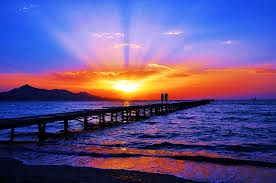

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

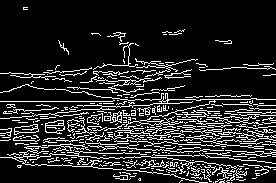

In [0]:
cv2_imshow(edges)

##Edge detector

The kernels for the edge detector is based on the principle , An edge is where there is a rapid change in  the image pixel (intensity) values. Thus to capture the rapid change of image pixels in the neighourhood first derivative of image intensity is calculated.

##Vertical Edge Detector

###Prewitt Operator for right vertical edge detector


 $V= \begin{pmatrix}
  1 & 0 & -1 \\
  1 & 0 & -1\\
  1 & 0 & -1
 \end{pmatrix}$
 
 The first column has all brighter pixel and  last column has all the dark pixels .
 
 This change of intensity over the columns helps in finding the image gradient of the input image
 

 
 
 

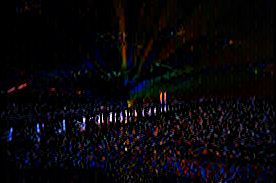

In [0]:
# vertical edges
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[1,0,-1],[1,0,-1],[1,0,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

 In the below output image it can be seen that all the** Vertical supporting columns** of the bridge is visible. 

##Horizontal Edge Detector

###Sobel Operator for Top horizontal edge detector


 $H_t= \begin{pmatrix}
  1 & 2 & 1 \\
  0 & 0 & 0\\
  -1 & -2 & -1
 \end{pmatrix}$
 
 The first row has all brighter pixel and  last row has all the dark pixels .The matrix is just the transpose of the Sobel operator of vertical Edge detector.
 
 In Top horizontal edge detector  as  more brighter pixels are present in the first row so the result of convolution on image enhances the pixel values at the top.

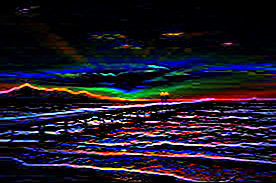

In [0]:
#Horizontal edges
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[1,2,1],[0,0,0],[-1,-2,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

 In the below output image it can be seen the **TOP EDGE** (which is almost horizontal ) of mountain is seen and also other horizontal edges .




###Sobel Operator for Bottom horizontal edge detector


 $H_b= \begin{pmatrix}
  -1 &- 2 &- 1 \\
  0 & 0 & 0\\
  1 & 2 & 1
 \end{pmatrix}$
 
 The first row has all darker pixel and  last row has all the brighter pixels .
 
 In bottom horizontal edge detector  as  more brighter pixels are present in the last row so the result of convolution on image enhances the pixel values at the bottom.

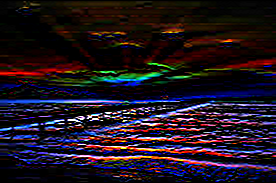

In [0]:
#Horizontal edges
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,-2,-1],[0,0,0],[1,2,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

 In the below output image it can be seen that the bottom horizontal edge detectors are visible but  top edge of mountain is not visible here.

##Identity Function


 $I= \begin{pmatrix}
  0 &0 &0 \\
  0 & 1 & 0\\
  0 & 0 & 0
 \end{pmatrix}$
 
 As only the centre element is present , when the input image is convolved with the kernel, the pixel value of image is not altered.

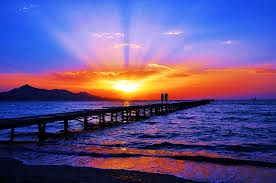

In [0]:
#identity function
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

##Sharpen Kernel


 $I= \begin{pmatrix}
  0 &-1 &0 \\
  -1 & 5 & -1\\
  0 & -1 & 0
 \end{pmatrix}$

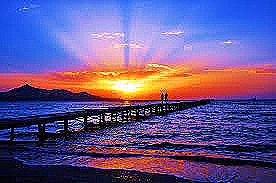

In [0]:
# sharpened images
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

##Blur Kernel


 $I= \begin{pmatrix}
  .0625&.125&.0625 \\
  0.125 & .25 & .125\\
  .0625&.125&.0625
 \end{pmatrix}$

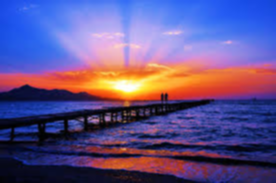

In [0]:
# blur images
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[.0625,.125,.0625],[.125,.25,.125],[.0625,.125,.0625]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

##45 degree edge detector


 $I= \begin{pmatrix}
  -5 &-5 &0 \\
  -5 & 0 & 5\\
  0 & 5 & 5
 \end{pmatrix}$

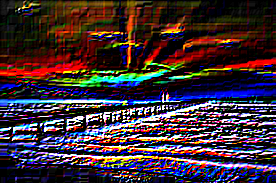

In [0]:
# 45 degree line
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-5,-5,0],[-5,0,5],[0,5,5]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)